# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [304]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy
import pandas
import scipy.stats as sps
import matplotlib.pyplot as matplt
from matplotlib.ticker import ScalarFormatter, LogLocator

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

- Определим функцию, отрисовывающую для заданного распределения плотность и гистограмму

In [3]:
def show_distribution(distribution, distribution_name, loc, scale, size, xmin, xmax):
    """
    Функция, отрисовывающая для распределения его плотность на отрезке и гистограмму сгенерированной выборки

    Args:
        distribution: Распределение
        distribution_name: Название распределения
        loc: Минимальное значение
        scale: Параметр распределения
        size: Количество точек выборки
        xmin: Левая граница графика
        xmax: правая граница графика
    """
    distribution_sample = distribution.rvs(loc=loc, scale=scale, size=size)
    distribution_grid = numpy.linspace(xmin, xmax, 10000)

    matplt.figure(figsize=(16, 9))
    matplt.hist(distribution_sample, bins=25, density=True, alpha=0.6, label='Гистограмма выборки')
    matplt.plot(distribution_grid, distribution.pdf(distribution_grid, loc, scale), color='red', lw=5,
                label='Плотность случайной величины')

    matplt.grid(ls=':')
    matplt.xlabel('Значение x', fontsize=18)
    matplt.ylabel('Плотность и гистограмма выборки', fontsize=18)
    matplt.title(rf'Случайная величина $\xi \sim$ {distribution_name}', fontsize=20)
    matplt.legend(fontsize=14, loc=1)
    matplt.xlim((xmin, xmax))
    matplt.tight_layout()
    matplt.show()

- Теперь построим графики для равномерного распределения

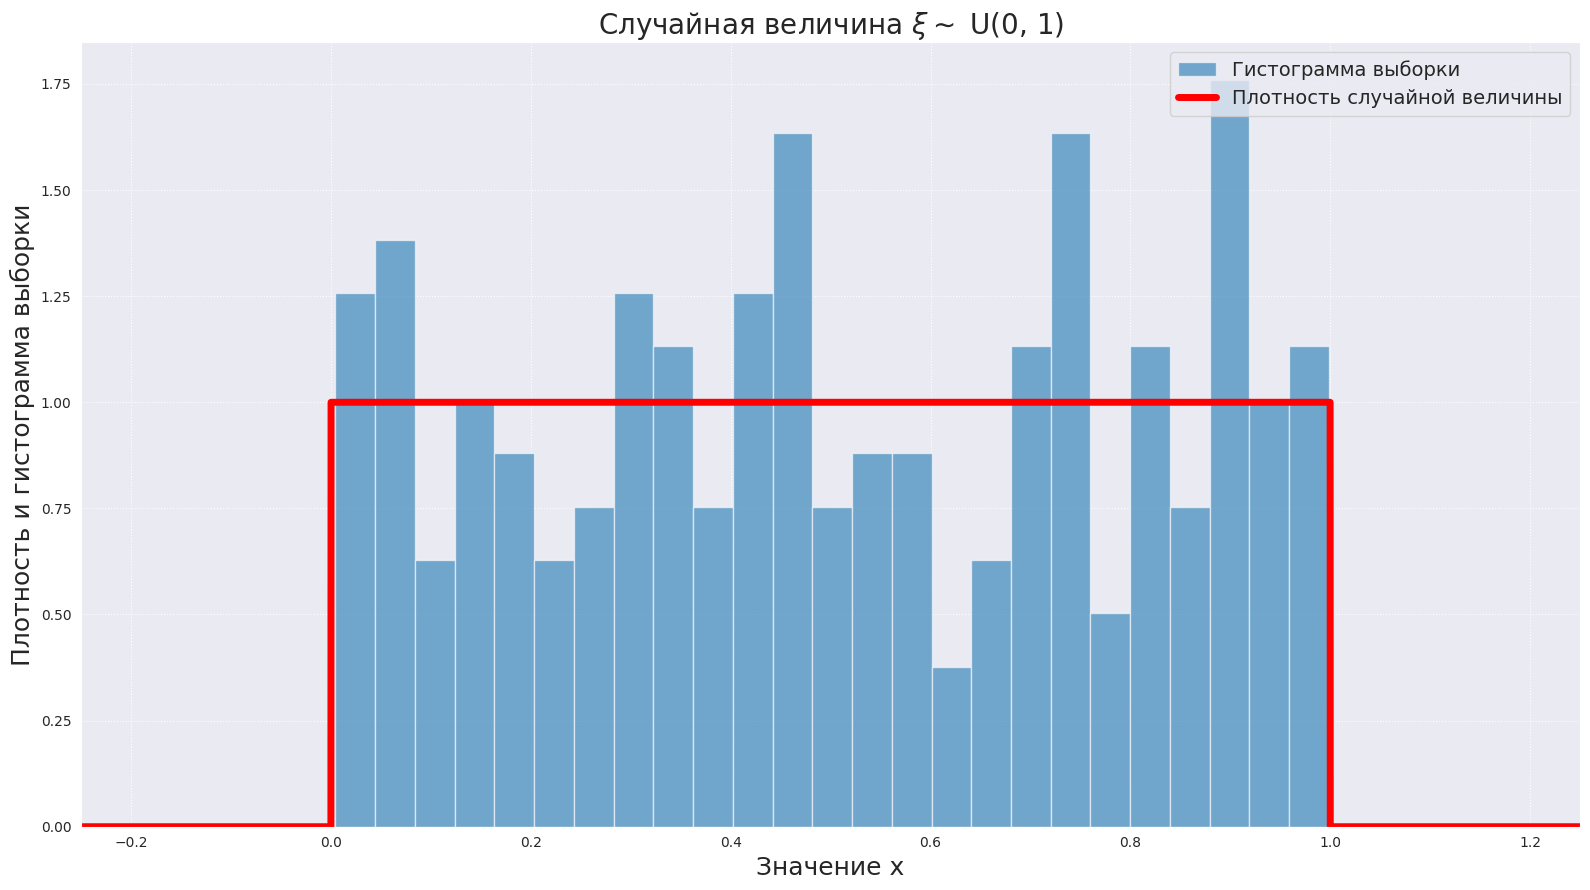

In [4]:
show_distribution(sps.uniform, "U(0, 1)", loc=0, scale=1, size=200, xmin=-0.25, xmax=1.25)

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

- Реализуем функцию равномерного распределения

In [5]:
def uniform(size: int | tuple = 1, precision: int = 30):
    """
    Функция, генерирующая последовательность случайных величин из равномерного распределения U(0, 1)

    Args:
        size (int | tuple, optional): Размеры последовательности. Может быть матрица. Defaults to 1.
        precision (int, optional): Точность случайных величин. Defaults to 30.

    Returns:
        numpy.array: Массив размеров size, заполненный случайными числами
    """

    size_t = (size,) if isinstance(size, int) else size
    precision_t = (precision,) if isinstance(precision, int) else precision
    var = sps.bernoulli.rvs(p=0.5, size=size_t + precision_t)
    return (var * numpy.logspace(1, precision, base=0.5, num=precision)).sum(axis=-1)

- Теперь построим графики плотностей и аналогичные гистограммы для нашей функции равномерного распределения для разных точностей. Выше $2^{-64}$ брать нет смысла, так как это уже порядка $10^{-20}$, что довольно мало и к ней график не чувтсвителен

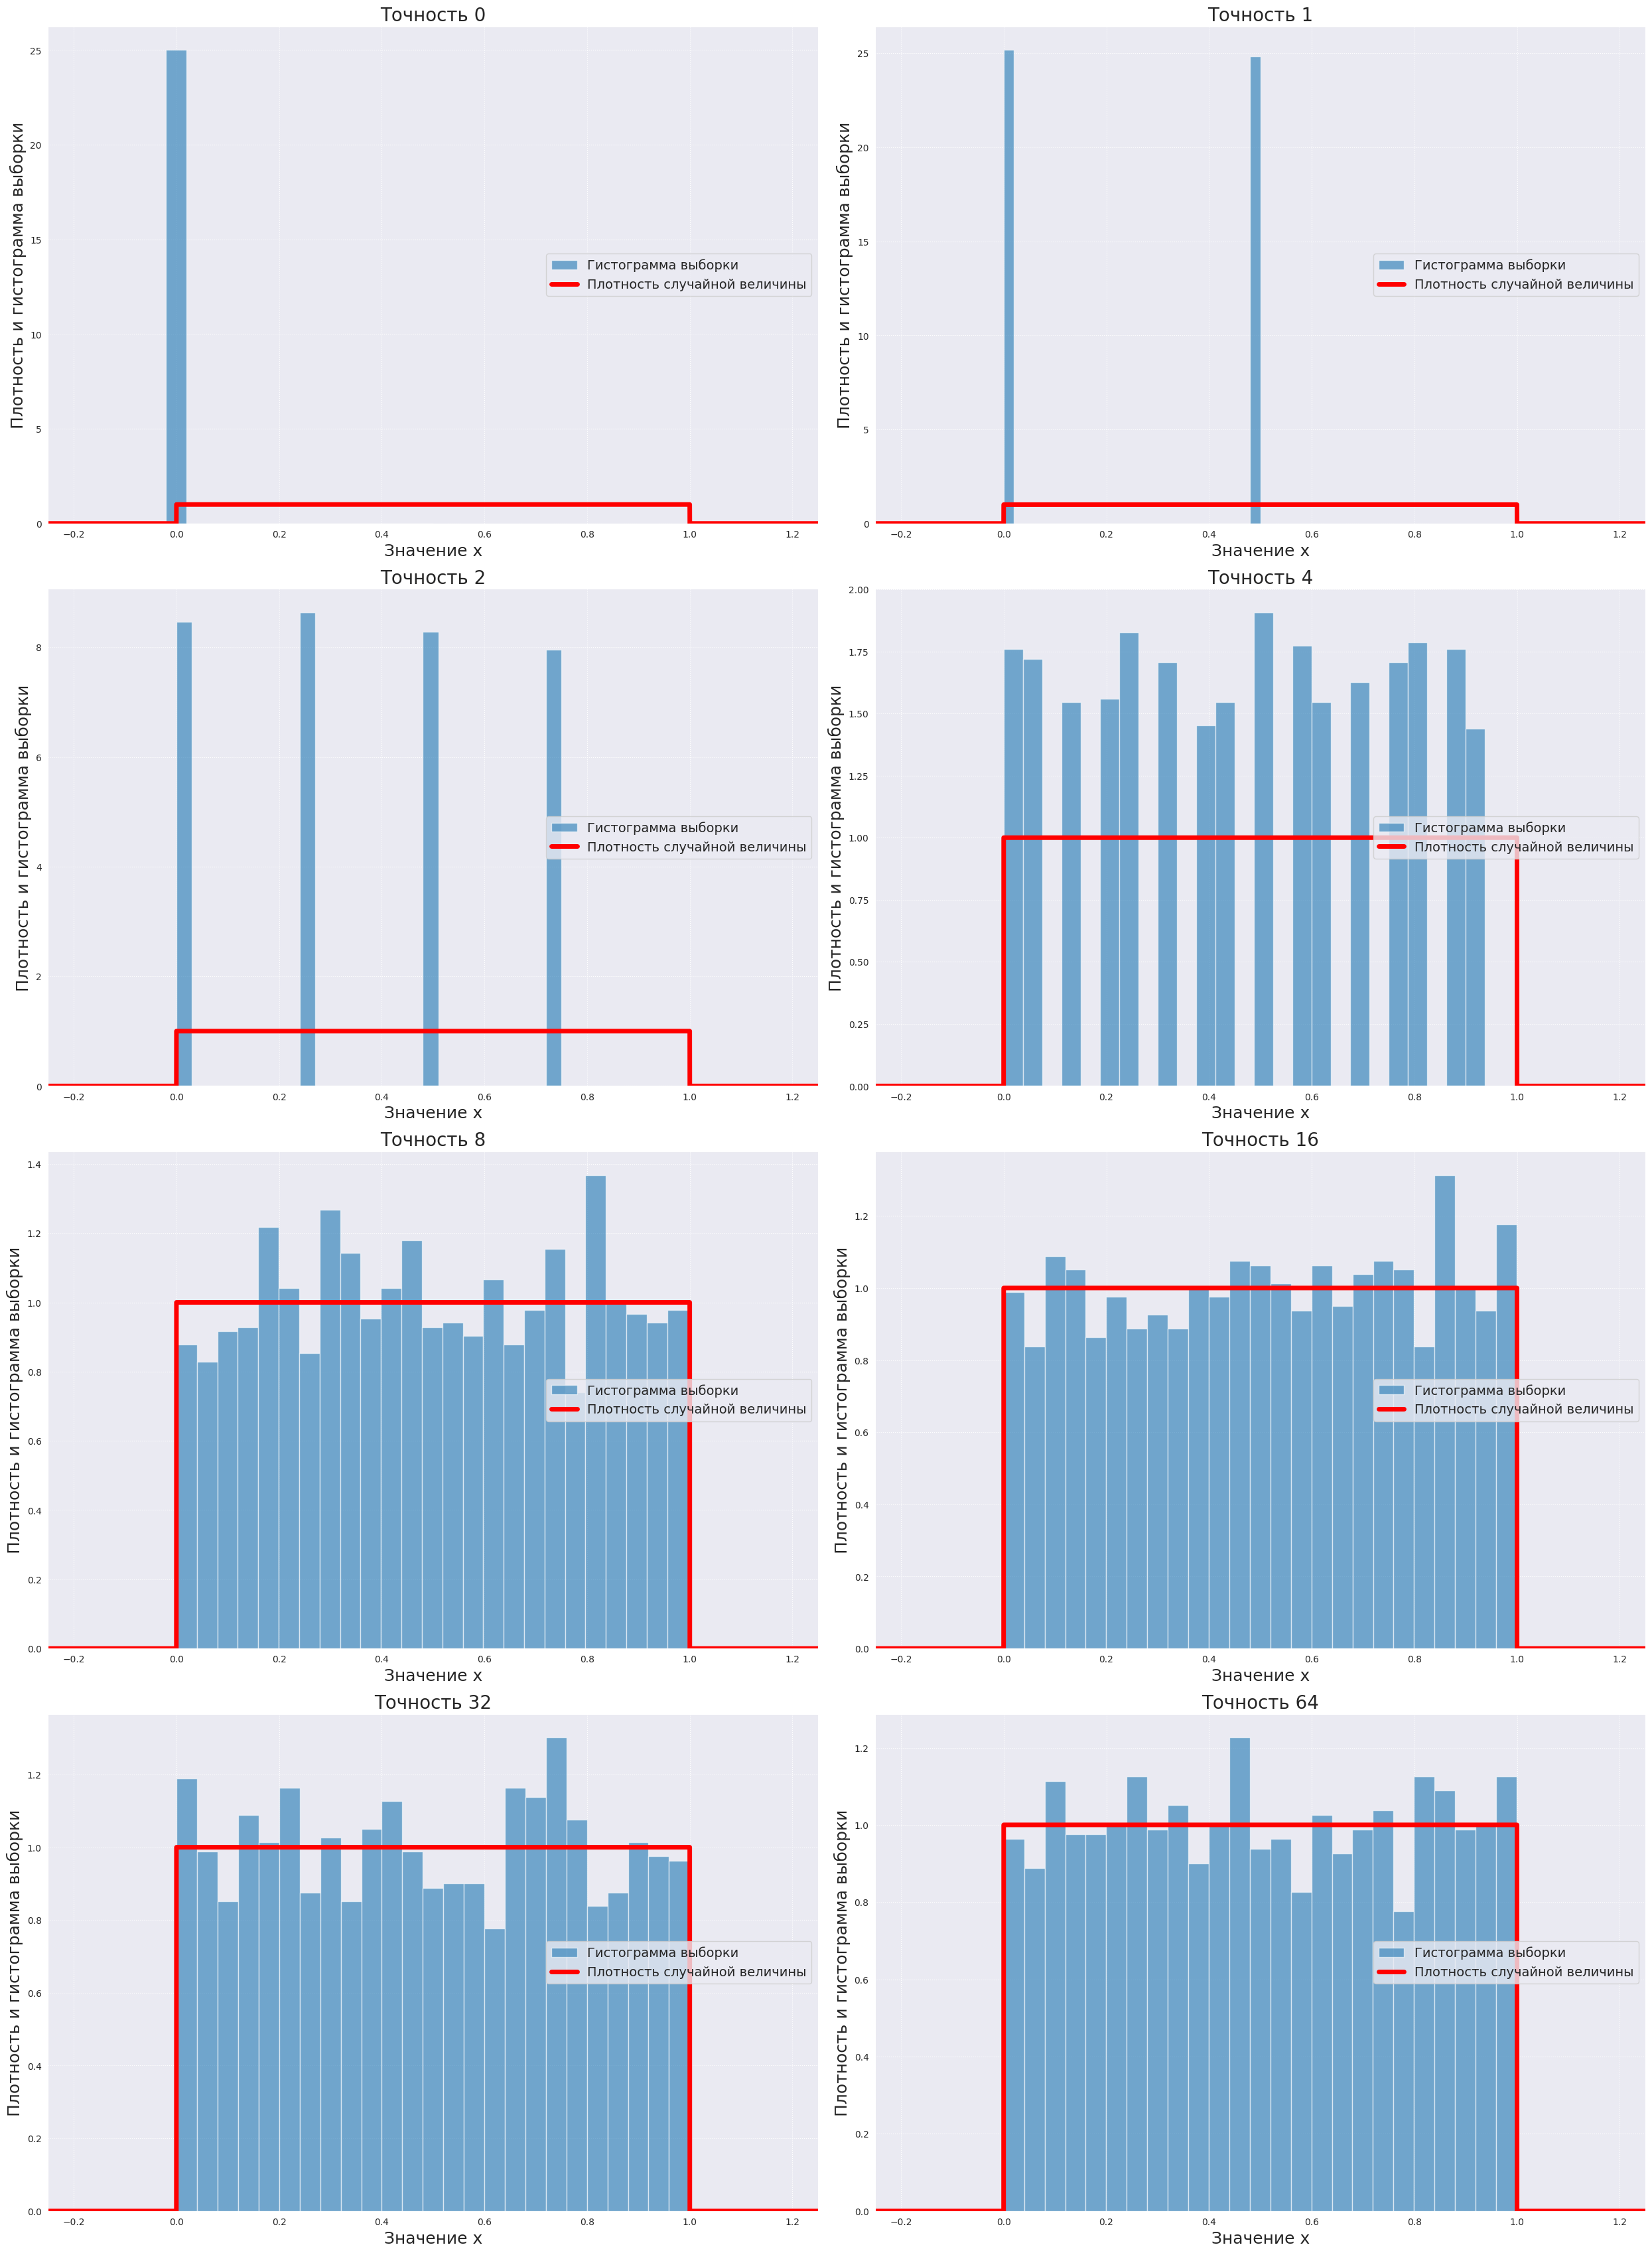

In [6]:
var_count = 2000
matplt.figure(figsize=(25, 42))

precisions = [0, 1, 2, 4, 8, 16, 32, 64]

# эксперименты
for i in range(len(precisions)):
    # Генерация выборки и вычисление средних
    samples = uniform(var_count, precisions[i])
    grid = numpy.linspace(-0.25, 1.25, 10000)

    # График
    matplt.subplot(5, 2, i + 1)
    matplt.hist(samples, bins=25, density=True, alpha=0.6, label='Гистограмма выборки')
    matplt.plot(grid, sps.uniform.pdf(grid, 0, 1), color='red', lw=5, label='Плотность случайной величины')

    matplt.grid(ls=':')
    matplt.title(f"Точность {precisions[i]}", fontsize=20)
    matplt.xlabel('Значение x', fontsize=18)
    matplt.ylabel('Плотность и гистограмма выборки', fontsize=18)
    matplt.legend(fontsize=14, loc=5)
    matplt.xlim((-0.25, 1.25))

matplt.tight_layout()
matplt.show()

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

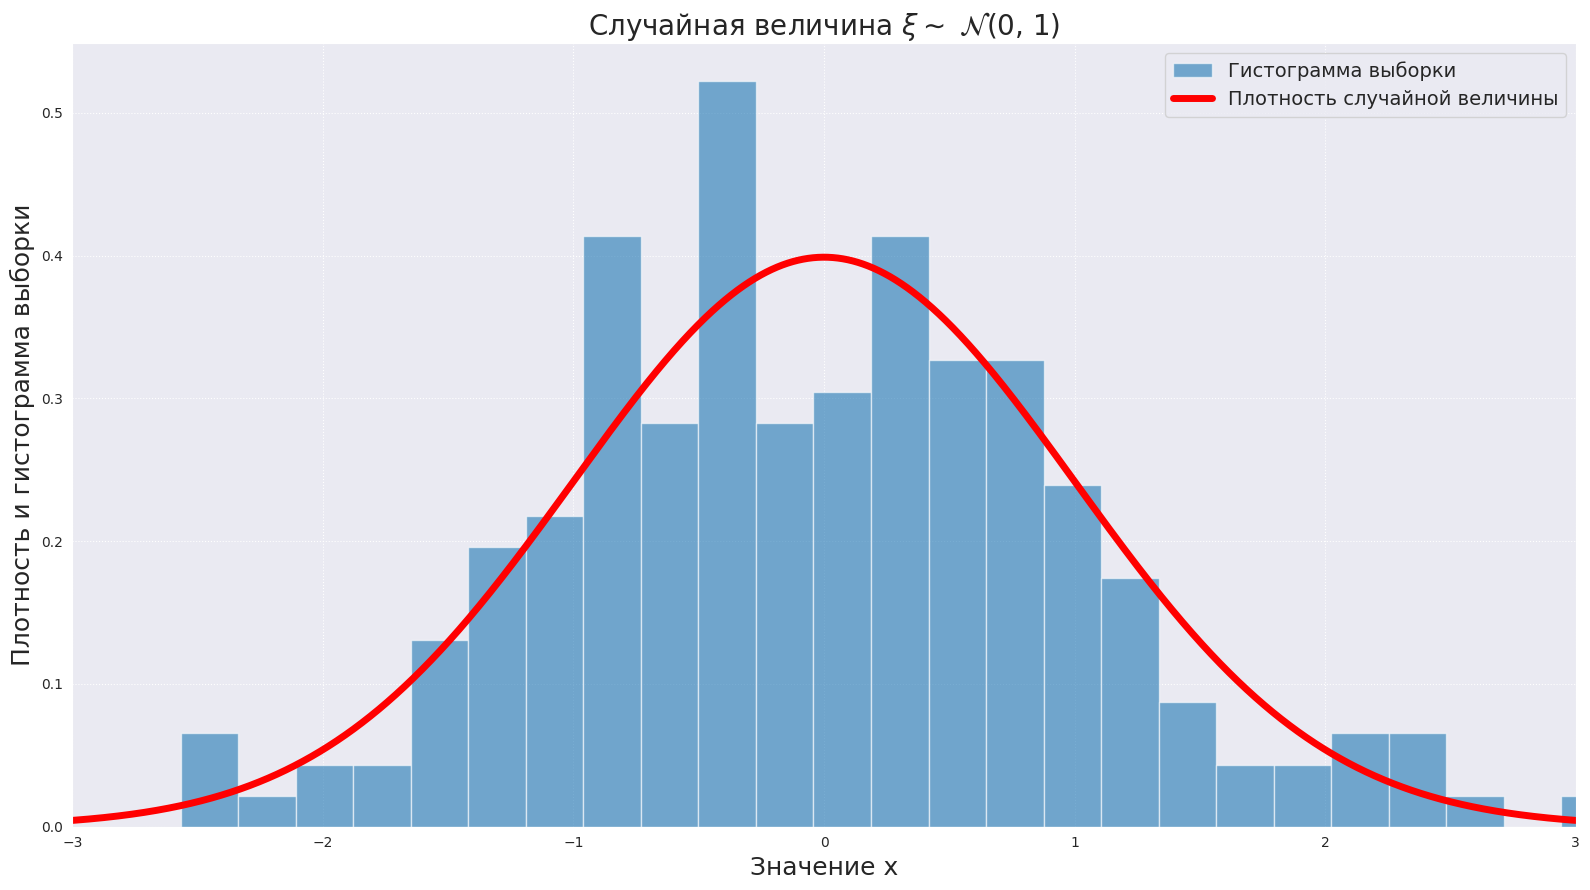

In [10]:
show_distribution(sps.norm, "$\mathcal{N}$(0, 1)", loc=0, scale=1, size=200, xmin=-3, xmax=3)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

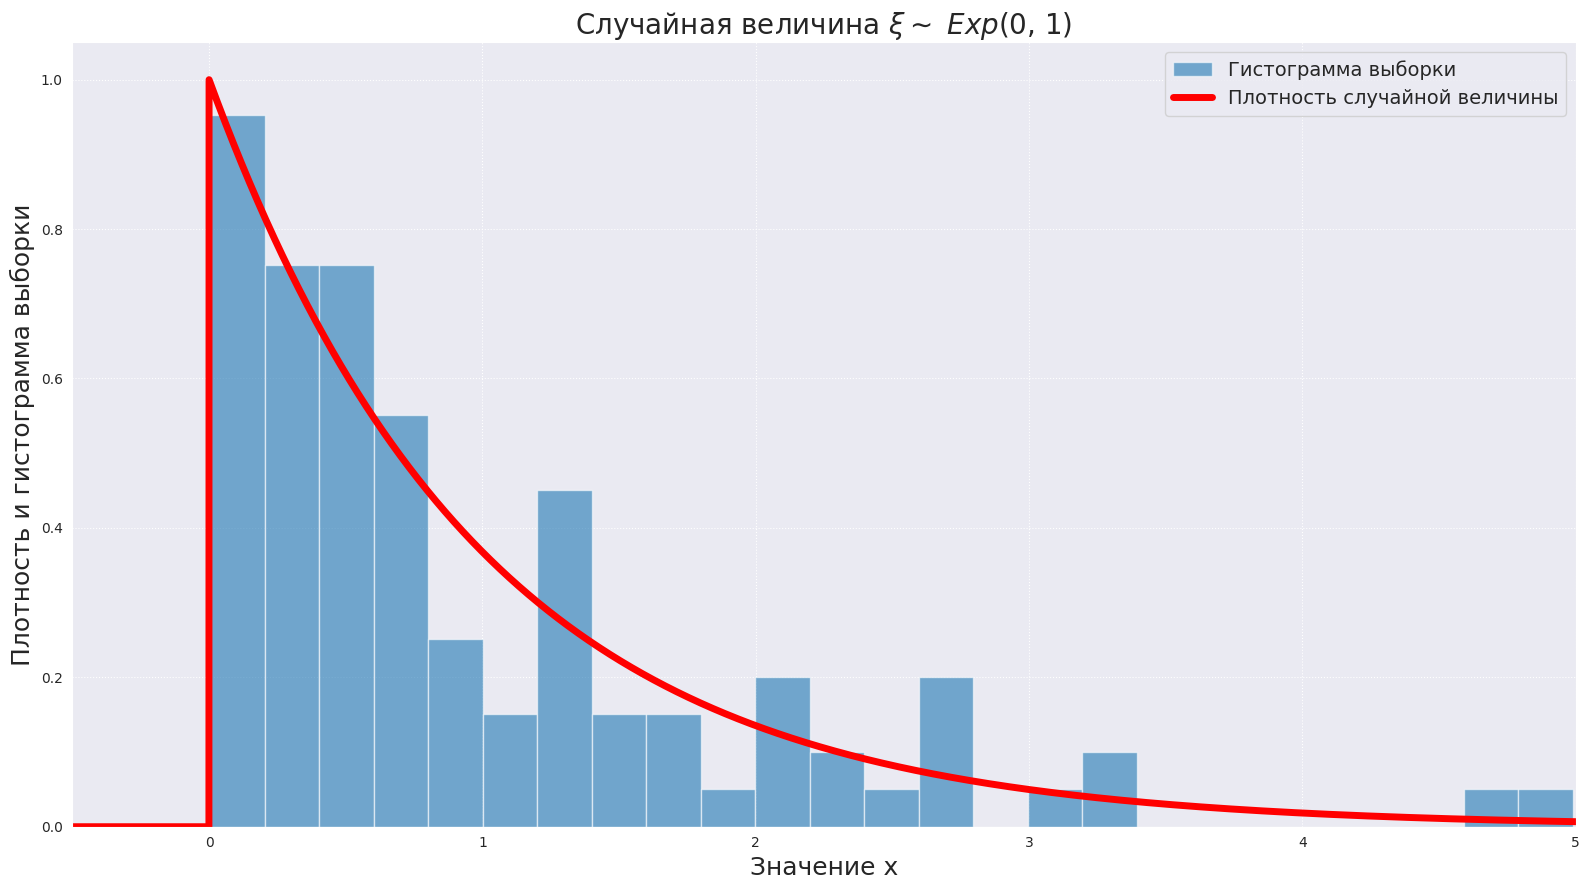

In [8]:
show_distribution(sps.expon, "$Exp$(0, 1)", loc=0, scale=1, size=100, xmin=-0.5, xmax=5)

**Выводы:**
- Для такого маленького количества точек (200 для нормального и равномерного распределений и 100 для экспоненциального) гистограмма выборки не расположена точно вдоль графика плотности случайной величины и имеет значительные отклонения. Это происходит в силу недостаточного количества рассматриваемых точек выборки: распределение будет иметь гистограмму точно вдоль плотности при количестве точек стремящемся к бесконечности, а у нас их всего 200. Для равномерного распределения особенно видны сильные скачки гистограммы
- В общем и целом форма гистограммы схожа с формой плотности распределения, пусть и имеет сильные отклонения
- При маленькой точности равномерное распределение ведет себя не совсем корректно: во-первых, случайные величины могут принимать слишком маленький набор значений, $2^{precision}$. Во-вторых, получается большой разброс на гистограмме плотности в абсолютном значении. При достаточно больших значениях точности все хорошо. Как мы видим, для таких графиков достаточно уже даже 8
- Плотность зависит больше от количества рассматриваемых величин, а не от точности, которая влияет исключительно на диапазон значений, принимаемых этими самыми величинами

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

- Строим распределения нормальное и Коши для одинаковых парметров `(0, 1)`

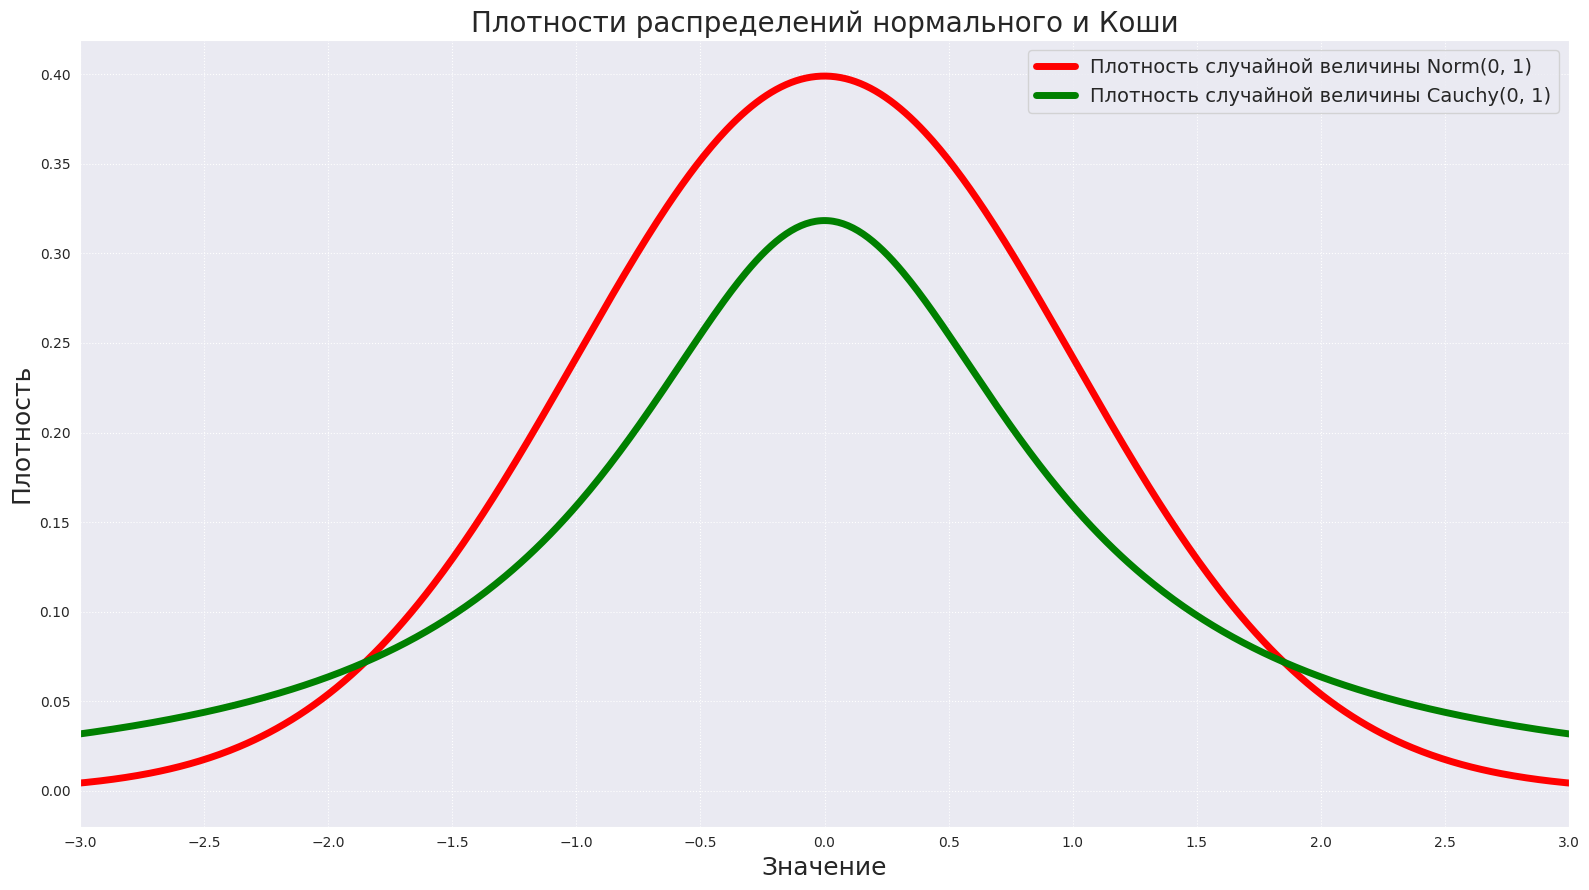

In [70]:
grid = numpy.linspace(-5, 5, 1000)

matplt.figure(figsize=(16, 9))
matplt.plot(grid, sps.norm.pdf(grid, 0, 1), color='red', lw=5, label='Плотность случайной величины Norm(0, 1)')
matplt.plot(grid, sps.cauchy.pdf(grid, 0, 1), color='green', lw=5, label='Плотность случайной величины Cauchy(0, 1)')

matplt.grid(ls=':')
matplt.title(rf'Плотности распределений нормального и Коши', fontsize=20)
matplt.xlabel('Значение', fontsize=18)
matplt.ylabel('Плотность', fontsize=18)
matplt.legend(fontsize=14, loc=1)
matplt.xlim((-3, 3))
matplt.locator_params(axis='x', nbins=13)
matplt.tight_layout()
matplt.show()

- Распределения по форме похожи
- Нормальное распределение имеет большую плотность на отрезке `(-1.8, 1.8)`, чем плотность распределения Коши, на остальных участках она меньше. Это происходит из-за того, что суммарно интеграл от плотности по всей прямой должен быть равен 1 

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

- Проверим, верен ли закон больших чисел для распределения Коши. Для этого сгенерируем набор из 1000 случайных величин и посчитаем по нему среднее в зависимости от размера набора. Затем построим график, повторим эксперимент 10 раз.

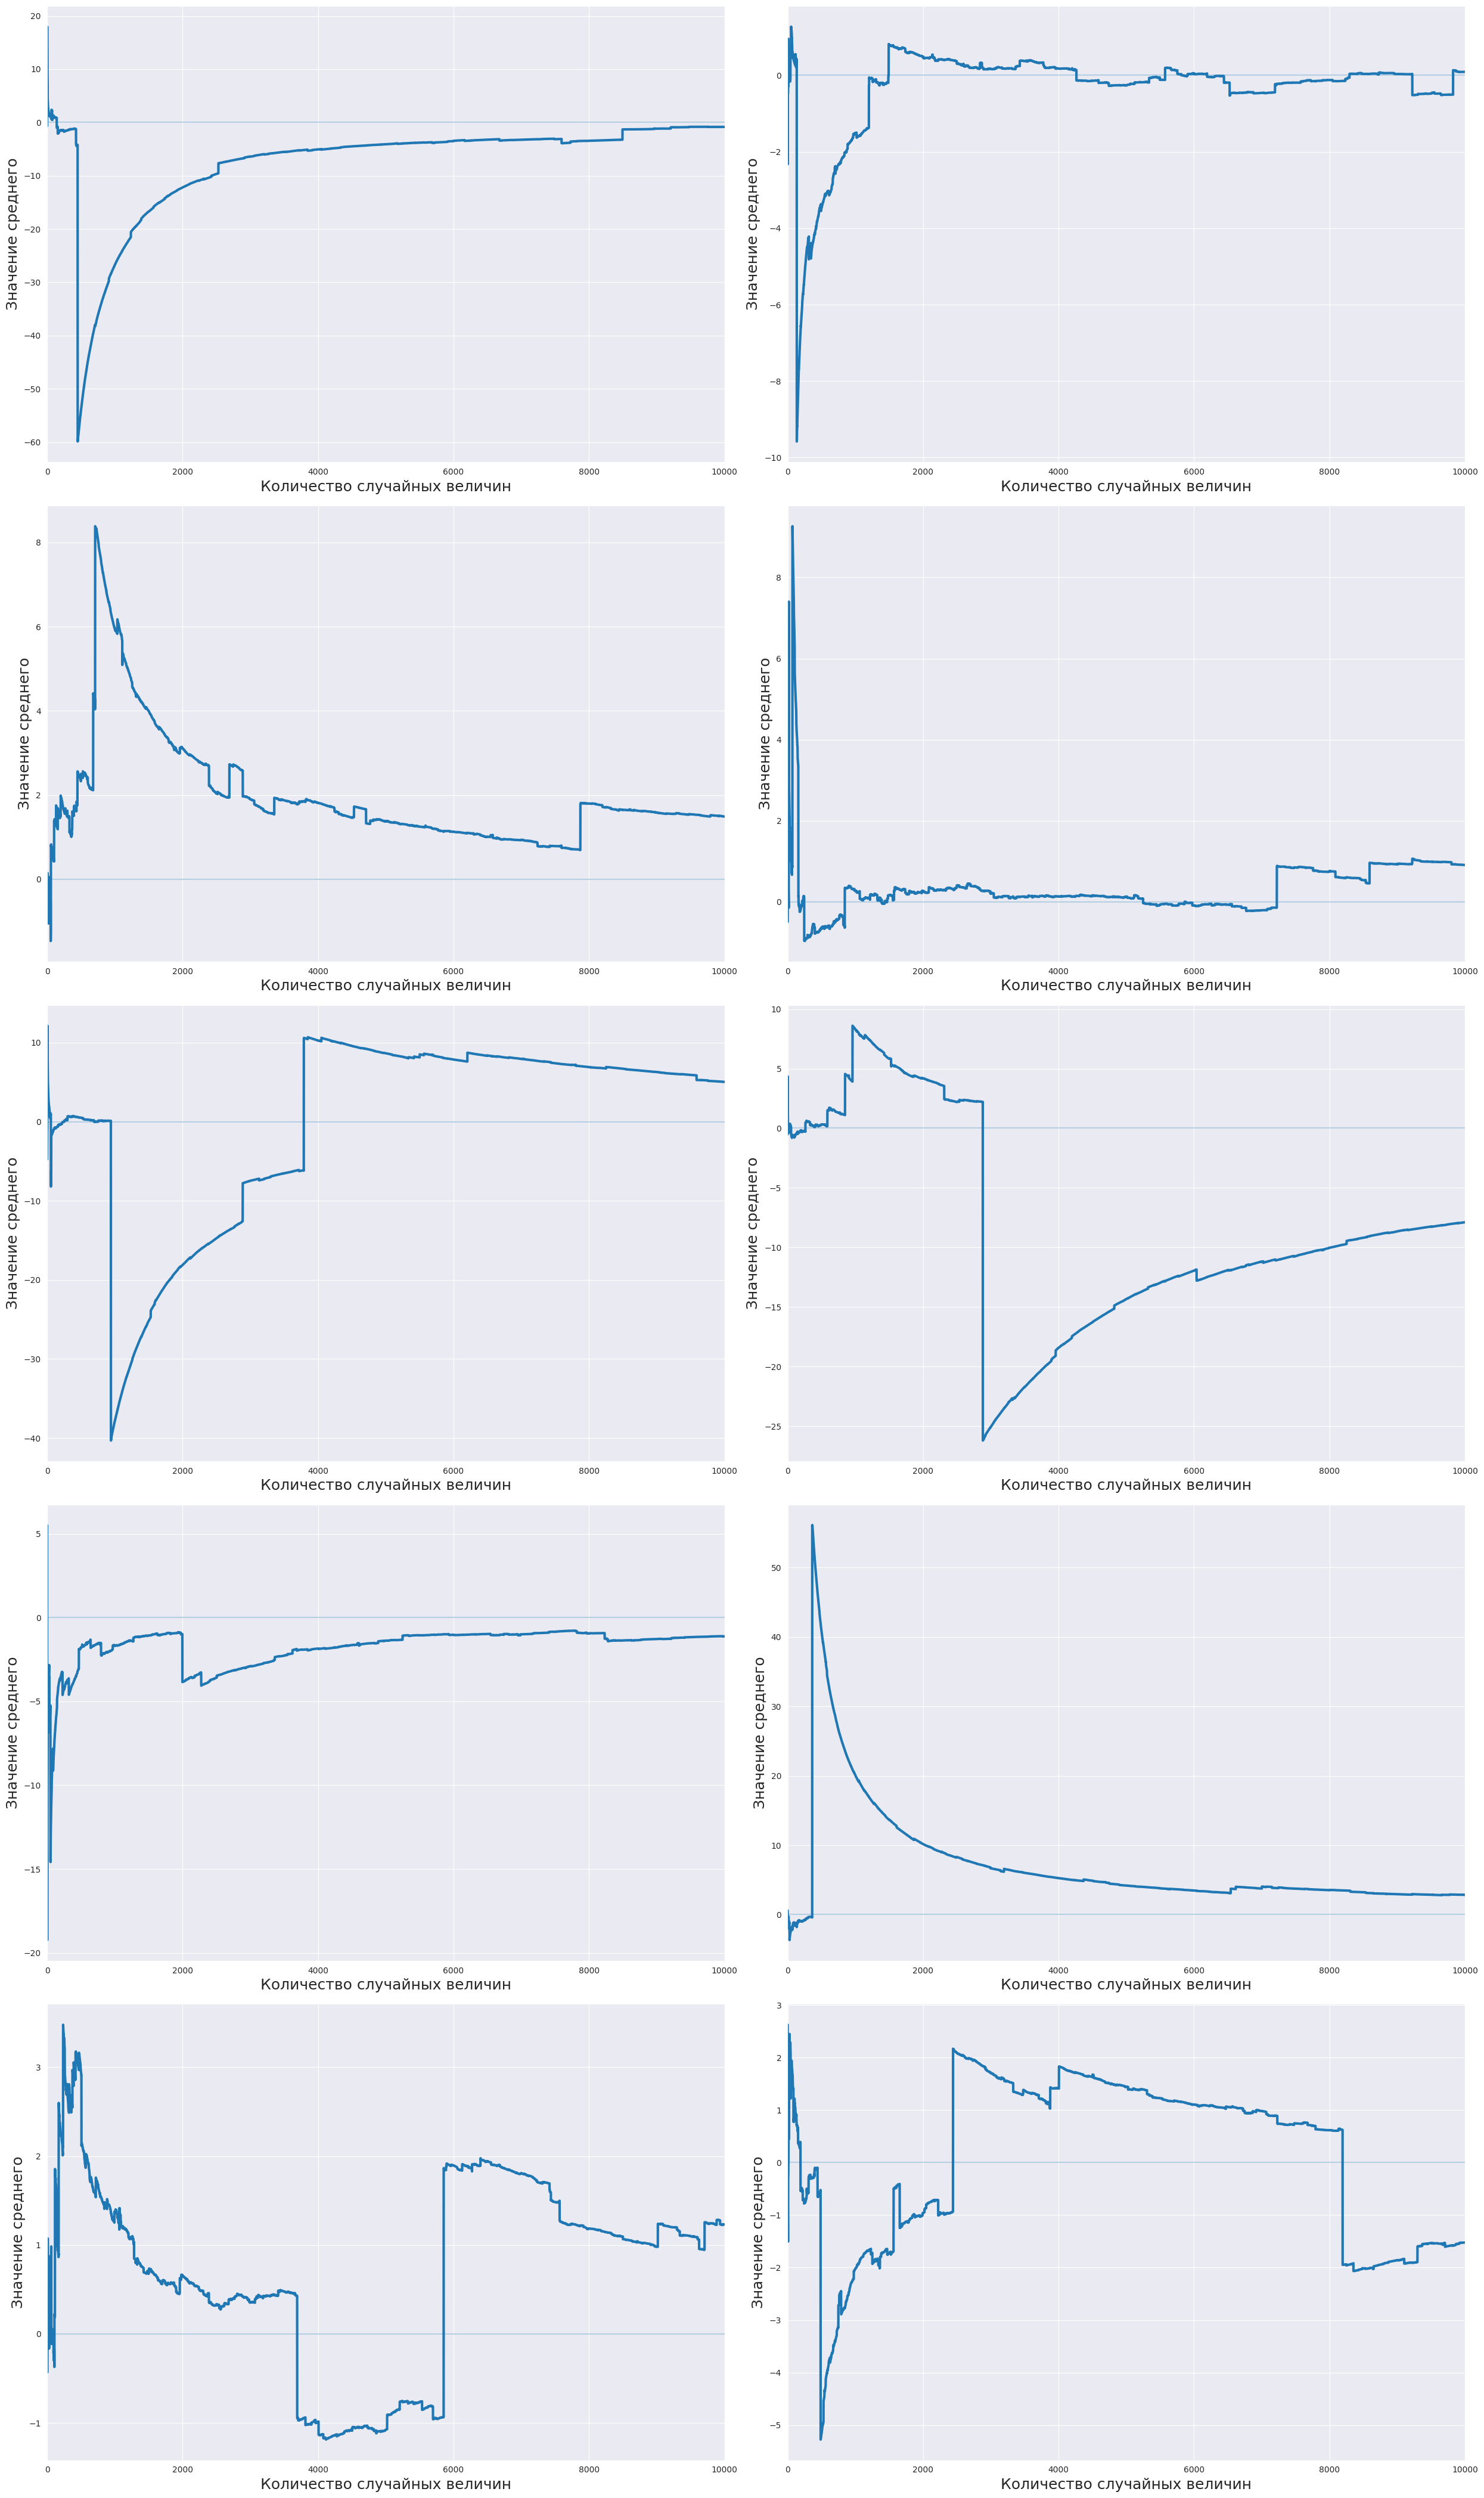

In [22]:
var_count = 10000
matplt.figure(figsize=(25, 42))

# эксперименты
for i in range(10):
    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=var_count)
    cum_means = samples.cumsum() / (numpy.arange(var_count) + 1)

    # График

    matplt.subplot(5, 2, i + 1)
    matplt.plot(cum_means, lw=3)
    matplt.hlines(0, 0, var_count, alpha=0.3)
    matplt.xlabel("Количество случайных величин", fontsize=18)
    matplt.ylabel("Значение среднего", fontsize=18)
    matplt.xlim((-5, var_count))

matplt.tight_layout()
matplt.show()

- Сгенерируем большое количество независимых наборов случайных величин и нарисуем их всех одним цветом, настроив прозрачность

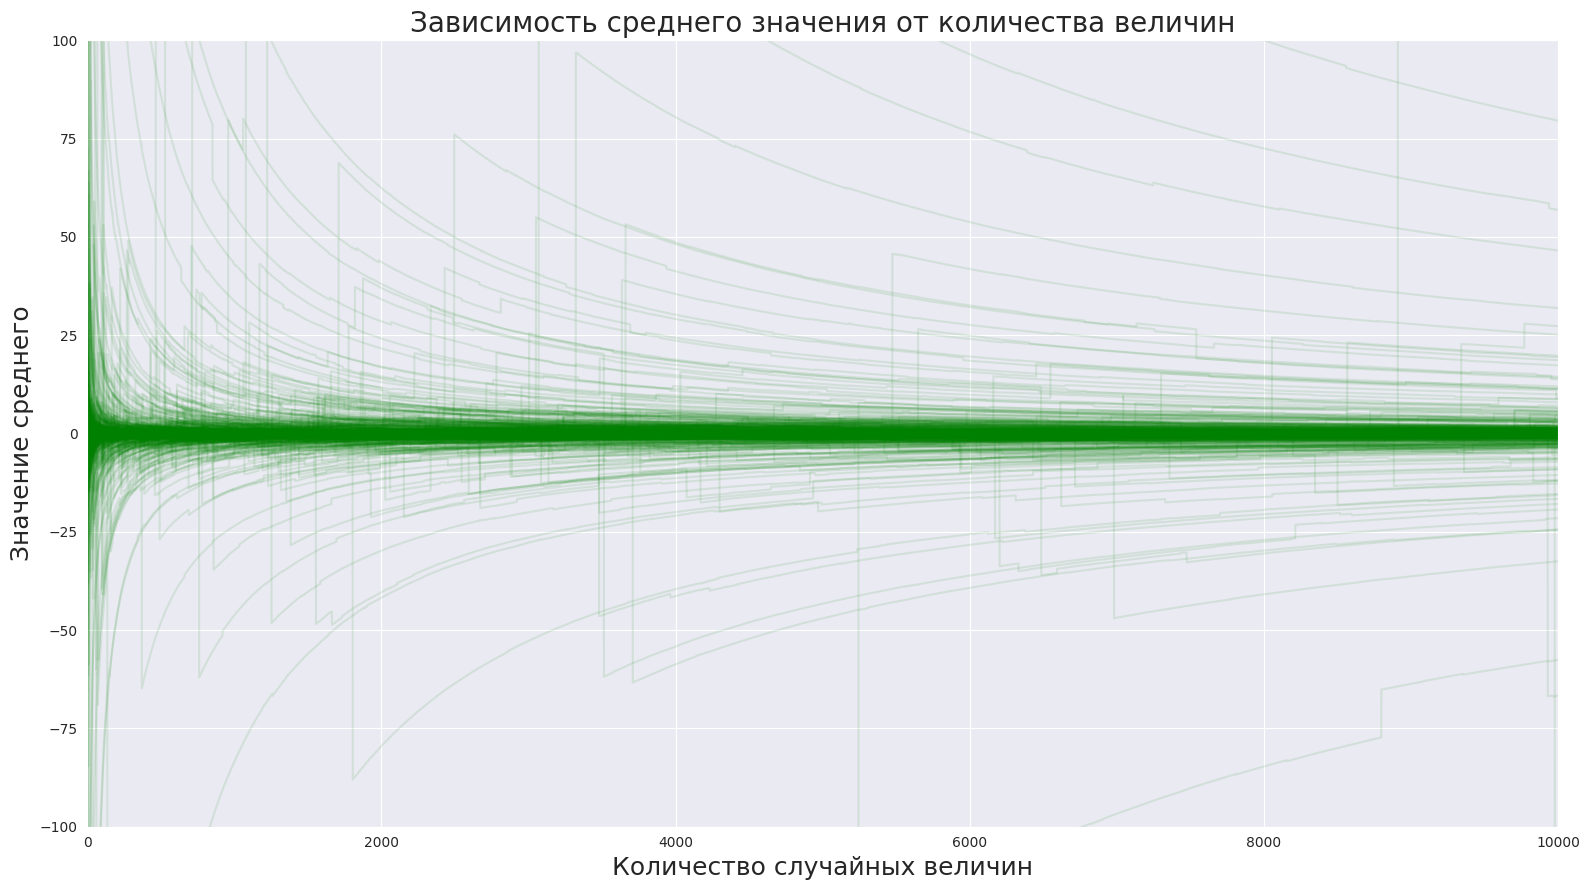

In [23]:
var_count = 10000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, var_count))
cum_means = samples.cumsum(axis=1) / (numpy.arange(var_count) + 1)

matplt.figure(figsize=(16, 9))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    matplt.plot(numpy.arange(var_count) + 1, cum_means[i], color="green", alpha=0.1)

matplt.title("Зависимость среднего значения от количества величин", fontsize=20)
matplt.xlabel("Количество случайных величин", fontsize=18)
matplt.ylabel("Значение среднего", fontsize=18)
matplt.xlim((0, var_count))
matplt.ylim((-100, 100))
matplt.tight_layout()
matplt.show()

- Из последнего графика мы видим, вне зависимости от количества просуммированных случайных величин продолжает находиться такая выборка, для которой отклонение от 0 остается большим. При этом все значения среднего стремятся к числам, близким к нулю, что видно из яркой полоски посередине (так происходит, потому что вероятность получить случайное число, близкое к нулю, для распределения Коши выше), за исключением моментов, когда внезапно появляются большие значения величин по распределению
- Из первых 10 графиков видно, что 0 не является значением, к которому стремится значение среднего каждой выборки, так как даже для больших количеств рассматриваемых случайных величин среднее может резко меняться или стремиться к ненулевому значению
- Следовательно, значение среднего расходится и закон больших чисел не верен. По-другому это можно было показать, доказав то, что для распределения Коши не существует значения матожидания в силу расходимости интеграла
- Несмотря на схожесть по форме плотностей нормального распределения и Коши, их свойства отличаются: в данном эксперименте мы показали, что для второго не верен закон

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`.median`</a>.

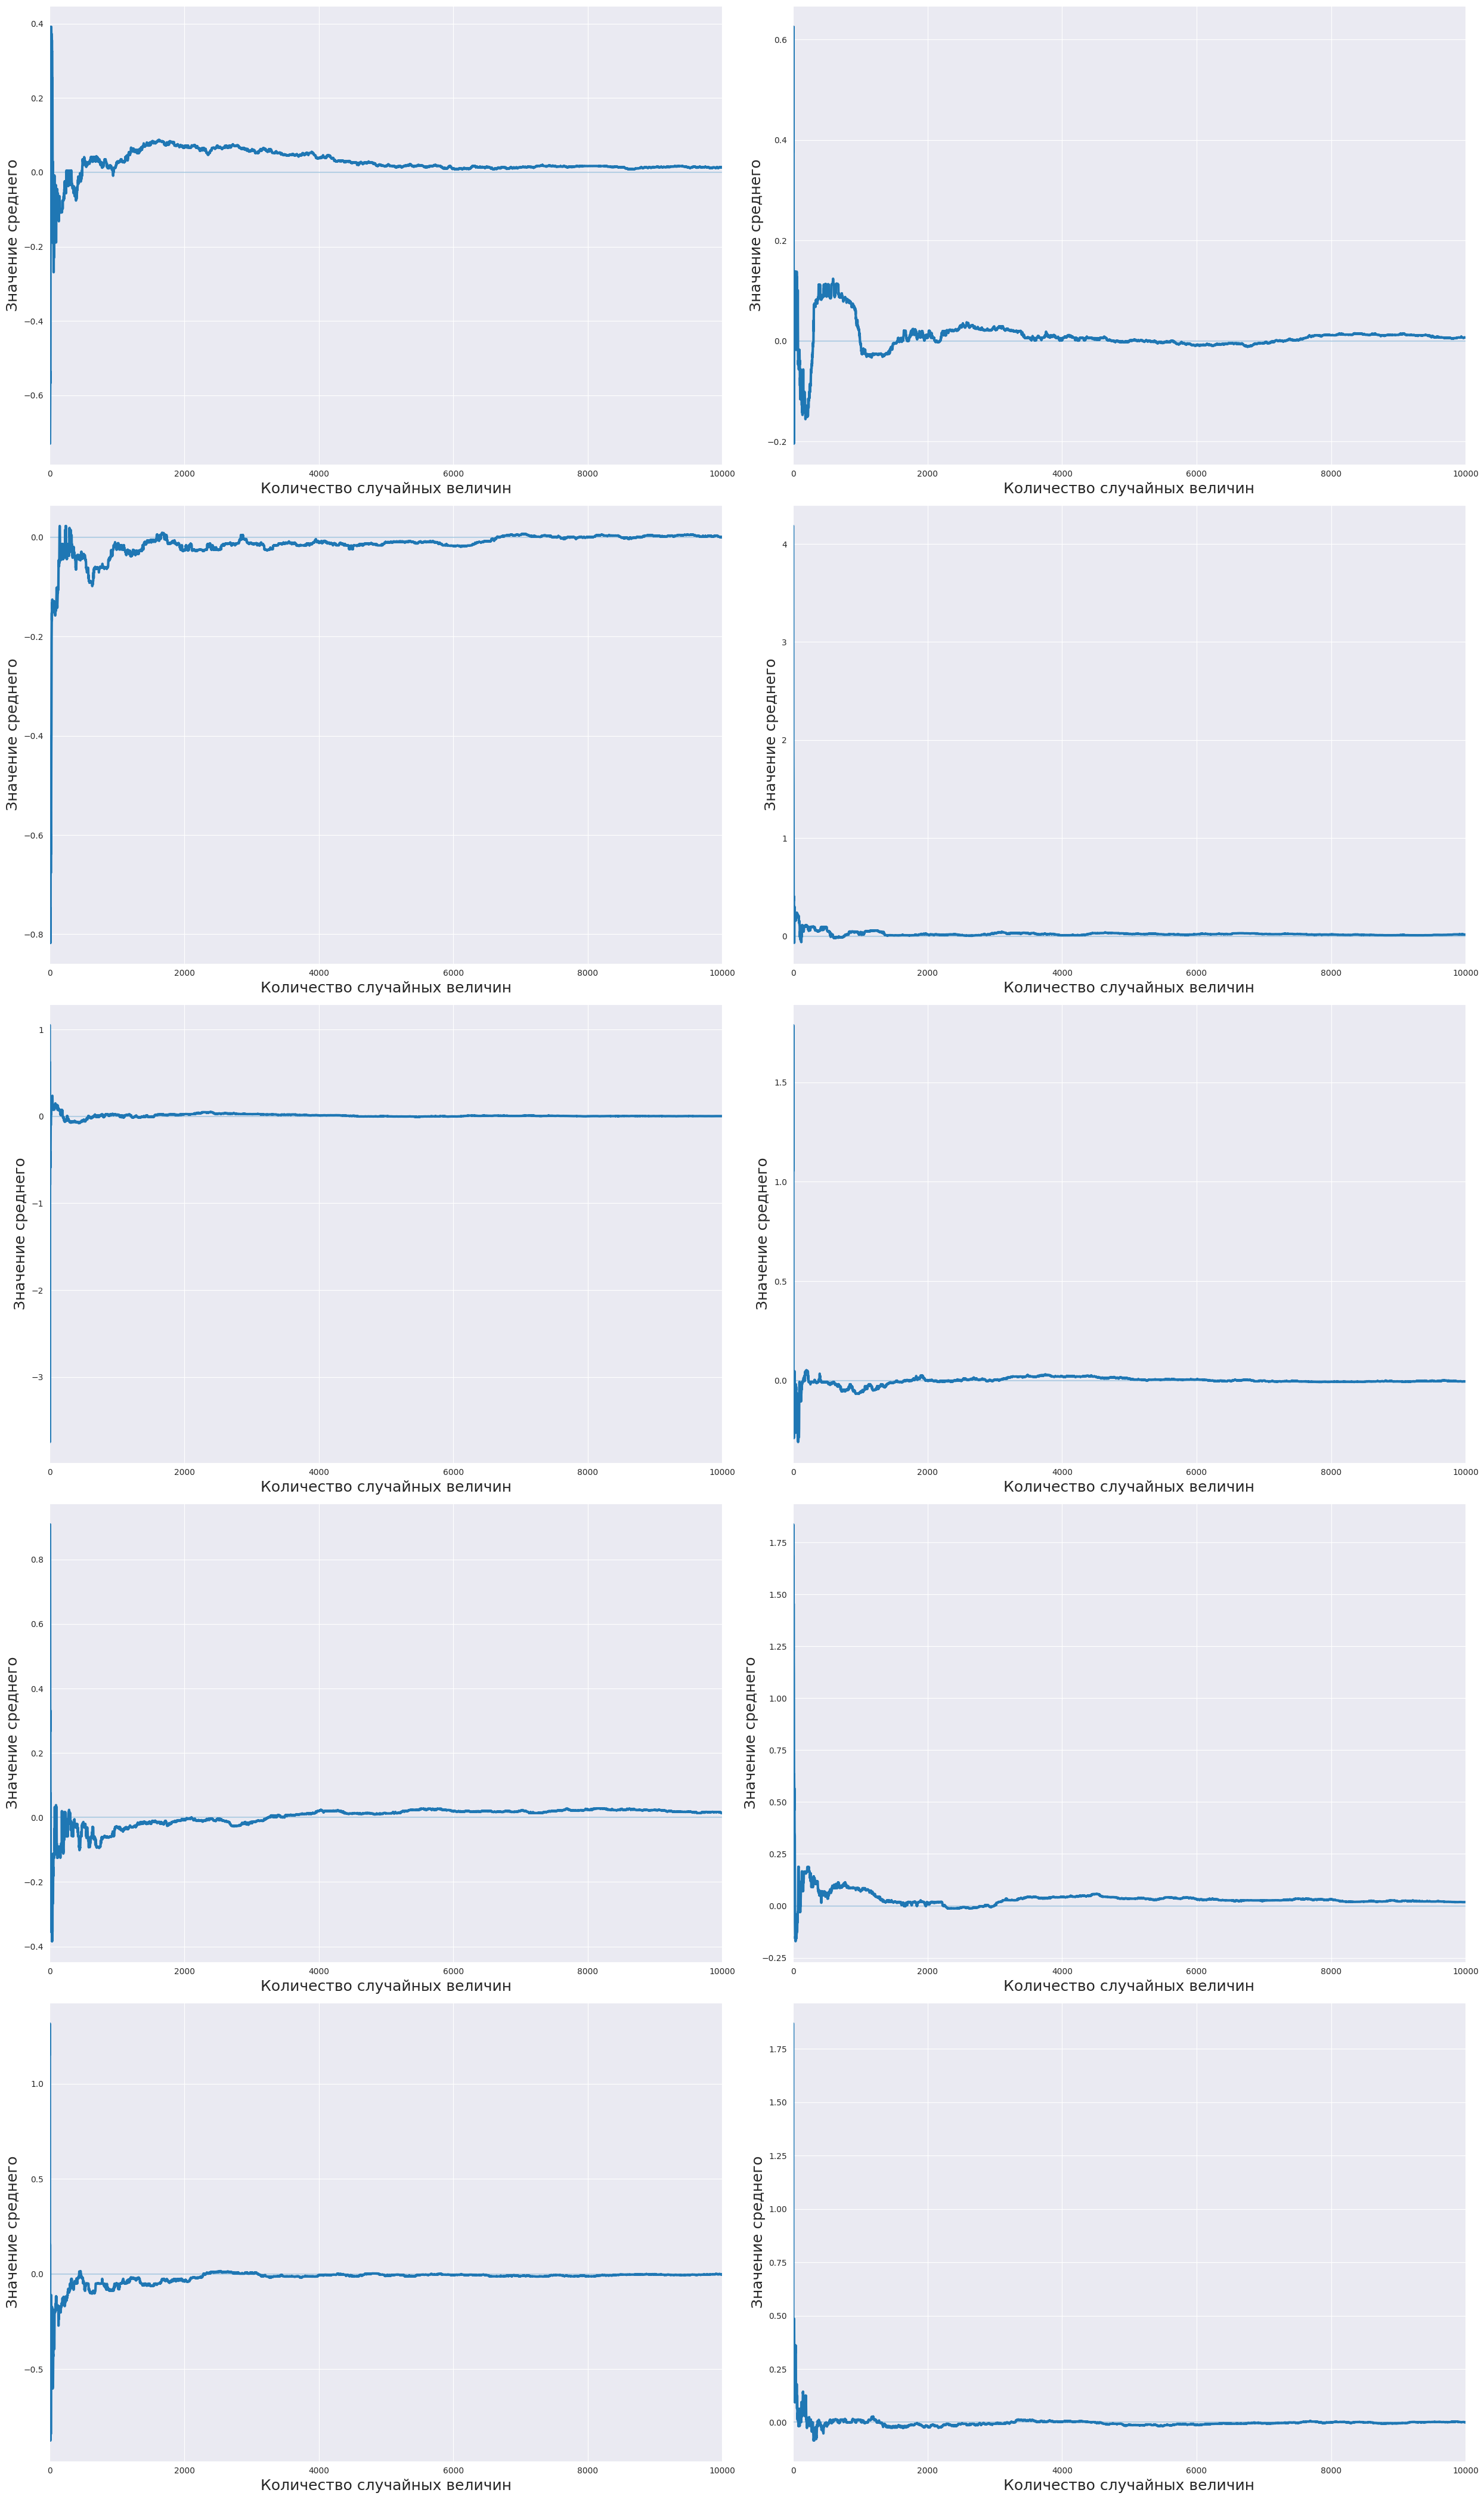

In [24]:
var_count = 10000
matplt.figure(figsize=(25, 42))

# эксперименты
for i in range(10):
    # Генерация выборки и вычисление медиан
    samples = sps.cauchy.rvs(size=var_count)
    cum_median = pandas.DataFrame(samples).expanding(1).median()

    # График
    matplt.subplot(5, 2, i + 1)
    matplt.plot(cum_median, lw=3)
    matplt.hlines(0, 0, var_count, alpha=0.3)

    matplt.xlabel("Количество случайных величин", fontsize=18)
    matplt.ylabel("Значение среднего", fontsize=18)
    matplt.xlim((-5, var_count))

matplt.tight_layout()
matplt.show()

- Сгенерируем большое количество независимых наборов случайных величин и нарисуем их всех одним цветом, настроив прозрачность

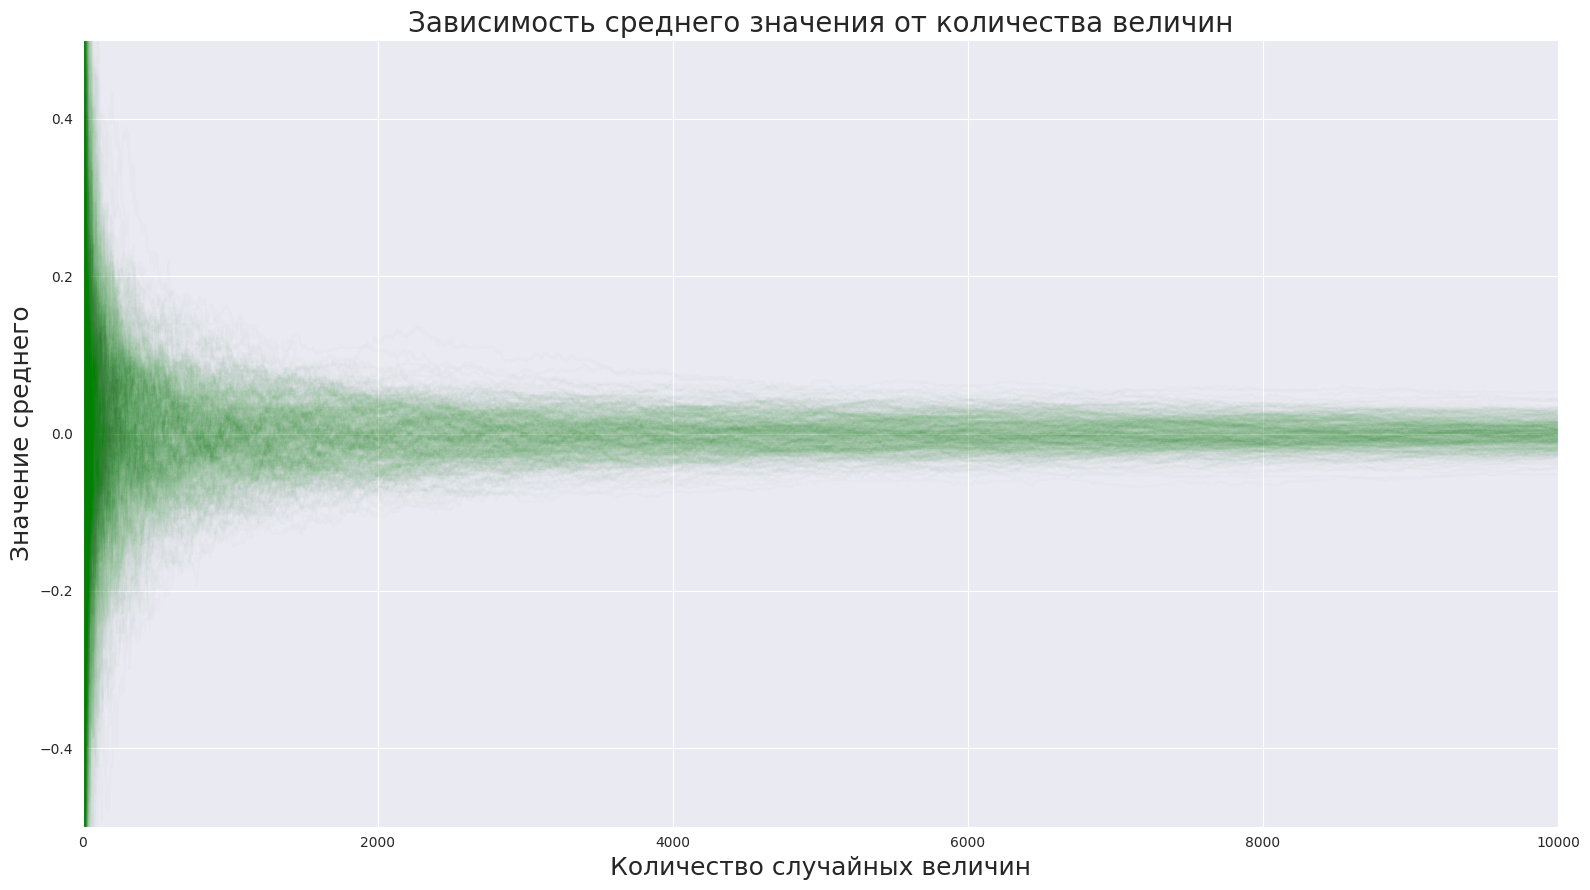

In [26]:
var_count = 10000  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, var_count)).T
cum_median = pandas.DataFrame(samples).expanding(1).median()

matplt.figure(figsize=(16, 9))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    matplt.plot(numpy.arange(var_count) + 1, cum_median[i], color="green", alpha=0.01)

matplt.title("Зависимость среднего значения от количества величин", fontsize=20)
matplt.xlabel("Количество случайных величин", fontsize=18)
matplt.ylabel("Значение среднего", fontsize=18)
matplt.xlim((0, var_count))
matplt.ylim((-0.5, 0.5))
matplt.tight_layout()
matplt.show()

**Вывод:**
- Медианное значение с увеличением количества рассматриваемых случайных величин стремится к нулю. Теоретически это можно обосновать так: для медианного значения `M` верно, что примерно половина случайных величин меньше него и примерно половина больше. То есть, вероятность, что случайная величина меньше `M`, равна вероятности, что больше `M`. В силу симметричности плотности распределения относительно нуля таким медианным значением как раз и будет `0` при устремлении к бесконечности количества рассматриваемых случайных величин
- Стремление `M` к нулю видно как из первых 10 графиков, так и из последнего, где много выборок на одном
- Последний график красивый, похож на зеленый туман) как будто Волан-де-Морт выстрелил Авадой Кедаврой вдоль оси абсцисс, пытаясь наконец поразить Гарри Поттера на бесконечности


### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `.where`.

- Определим функцию, считающую значения меры отклонения и возвращающую массивы `n`, `F(n)` и приближение необходимого размера по `n`

In [15]:
def count_measure(var_cnt: int, samples_cnt: int, expectation: float):
    """
    Функция считает значение меры и приближение по размеру выборок

    Args:
        var_cnt (int): Количество величин в выборке
        samples_cnt (int): Количество выборок
        expectation (float): Матожидание
    Returns:
        x, F_n, n_opt: Массив n, соответствующи значения F(n) и приближение по n
    """

    x_gen = numpy.arange(var_cnt) + 1
    variables = sps.bernoulli.rvs(p=expectation, size=(samples_cnt, var_cnt))
    F_n = numpy.abs(variables.cumsum(axis=1) / x_gen - expectation).sum(axis=0) / samples_cnt
    return x_gen, F_n, numpy.where(F_n < 0.02)[0][0]

- Определим функцию, строящую график зависимости `F(n)` от `n`

In [27]:
def show_measure(x_arr, y_arr, log: bool = False):
    """Функция Строит график зависимости y(x), опционально с логарифмическими осями

    Args:
        x_arr: Массив значений по x
        y_arr: Массив значений по y
        log (bool, optional): Логарифмировать ли оси
    """

    ax = matplt.figure(figsize=(16, 9)).add_subplot(111)
    ax.plot(x_arr, y_arr, color="green")

    ax.set_title("Зависимость меры отклонения от среднего от количества случайных величин", fontsize=20)
    ax.set_xlabel("Количество случайных величин", fontsize=18)
    ax.set_ylabel("Мера отклонения от среднего", fontsize=18)

    if log:
        approx = numpy.poly1d(numpy.polyfit(numpy.log10(x_arr), numpy.log10(y_arr), 1))
        ax.plot(x, 10 ** approx(numpy.log10(x)), "b--")

        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.yaxis.set_major_locator(LogLocator(base=10, subs=[1, 2, 5]))
        ax.xaxis.set_major_locator(LogLocator(base=10, subs=[1, 2, 5]))
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.xaxis.set_major_formatter(ScalarFormatter())
        ax.set_xlim(1, 1000)
        ax.set_ylim(0.01, 0.5)

    matplt.grid(ls=':')
    matplt.tight_layout()
    matplt.show()

- Построим график зависимости `F(n)` от `n` в обычном масштабе по обеим осям.

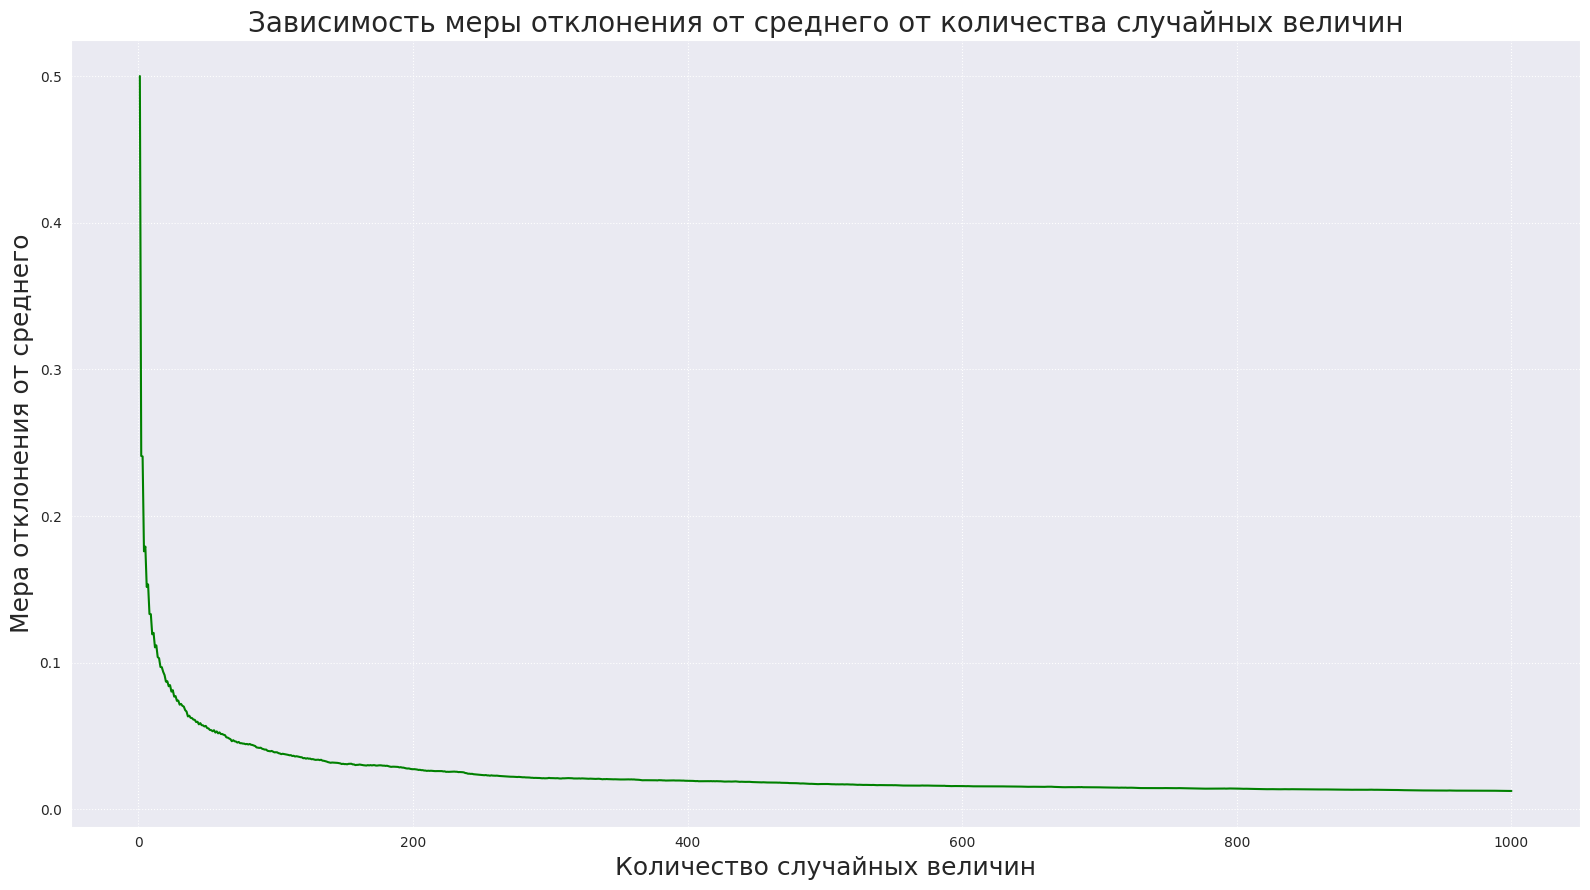

In [28]:
x, y, n_opt = count_measure(var_cnt=1000, samples_cnt=500, expectation=0.5)
show_measure(x, y)

- Видна логарифмическая зависимость. Теперь построим график зависимости `F(n)` от `n` в логарифмическом масштабе по обеим осям, дополнительно нарисовав трендовую линию

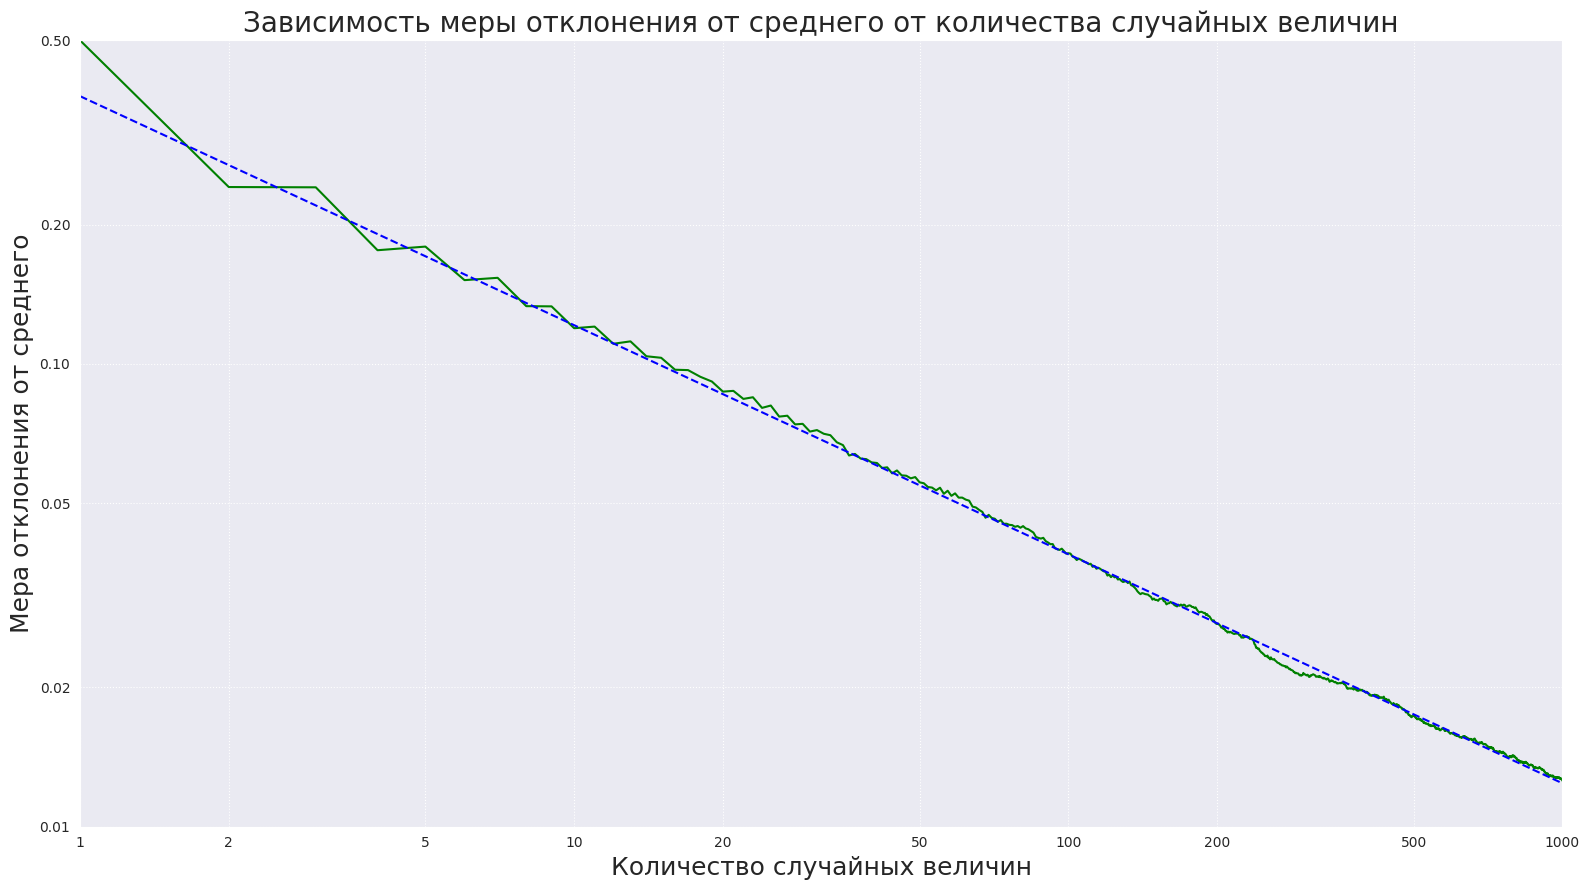

In [29]:
show_measure(x, y, log=True)

- Найдем минимальное значение `n`, при котором `F(n)` стала меньше либо равна `0.02`, то есть, приближение необходимого размера

In [30]:
print(f"n-оптимальное = {n_opt}")

n-оптимальное = 365


- В логарифмических осях зависимость меры отклонения от среднего от количества случайных величин получается практически линейной убывающей. На графике видны небольшие скачки, уменьшающие свою амплитуду с ростом количества величин. Скачки обоснованы тем, что шаг по количеству случайных величин дискретен, и на маленьких значениях кривая вырождается в ломаную, строящуюся по точкам. А так как величины случайные, то в силу случайных отклонений график слегка отходит от прямой. Логарифмичность шкалы по абсциссе усиливает данный эффект на малых `n`. Для исправления данного эффекта для каждого `n` будем рассматривать больше выборок, так как чем их больше - тем точнее результаты. Построим логарифмический график, чтобы убедится, что он превращается в прямую за исключением маленьких скачков при дискретном шаге с ростом количества выборок

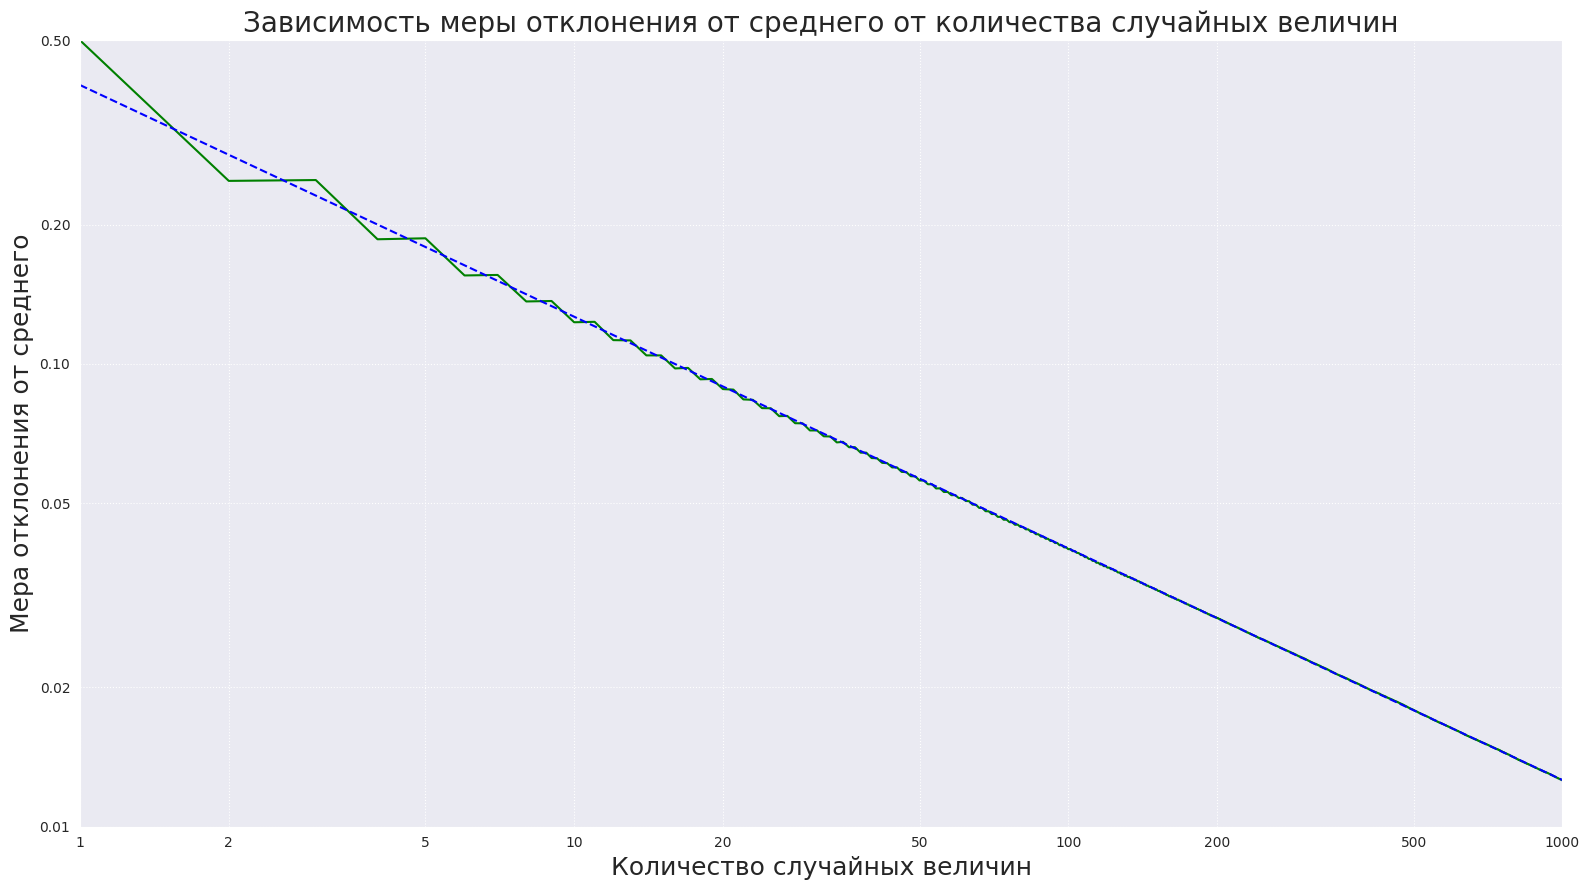

In [31]:
x, y, n_opt = count_measure(var_cnt=1000, samples_cnt=50000, expectation=0.5)
show_measure(x, y, log=True)

- Предположение подтвердилось. Теперь найдем требуемое `n`

In [33]:
print(f"n-оптимальное = {n_opt}")

n-оптимальное = 399


**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

- Определим функцию, строящую график зависимости `n_opt` от матожидания, а так же нарисуем аппроксимирующую параболу

In [46]:
def show_opt(x_arr, y_arr):
    """Функция строит график зависимости необходимого размера выборки от матожидания

    Args:
        x_arr: Значения по абсциссе
        y_arr: Значения по ординате
    """

    matplt.figure(figsize=(16, 9))
    matplt.plot(x_arr, y_arr, color="green")

    approx = numpy.poly1d(numpy.polyfit(x_arr, y_arr, 2))
    matplt.plot(x_arr, approx(x_arr), "b--")

    matplt.grid(ls=':')
    matplt.title("Зависимость необходимого размера выборки от матожидания", fontsize=20)
    matplt.xlabel("Матожидание", fontsize=18)
    matplt.ylabel("Необходимый размер выборки", fontsize=18)
    matplt.xlim(0.05, 0.95)
    matplt.ylim(50, 500)
    matplt.locator_params(axis='x', nbins=21)
    matplt.locator_params(axis='y', nbins=11)
    matplt.tight_layout()
    matplt.show()

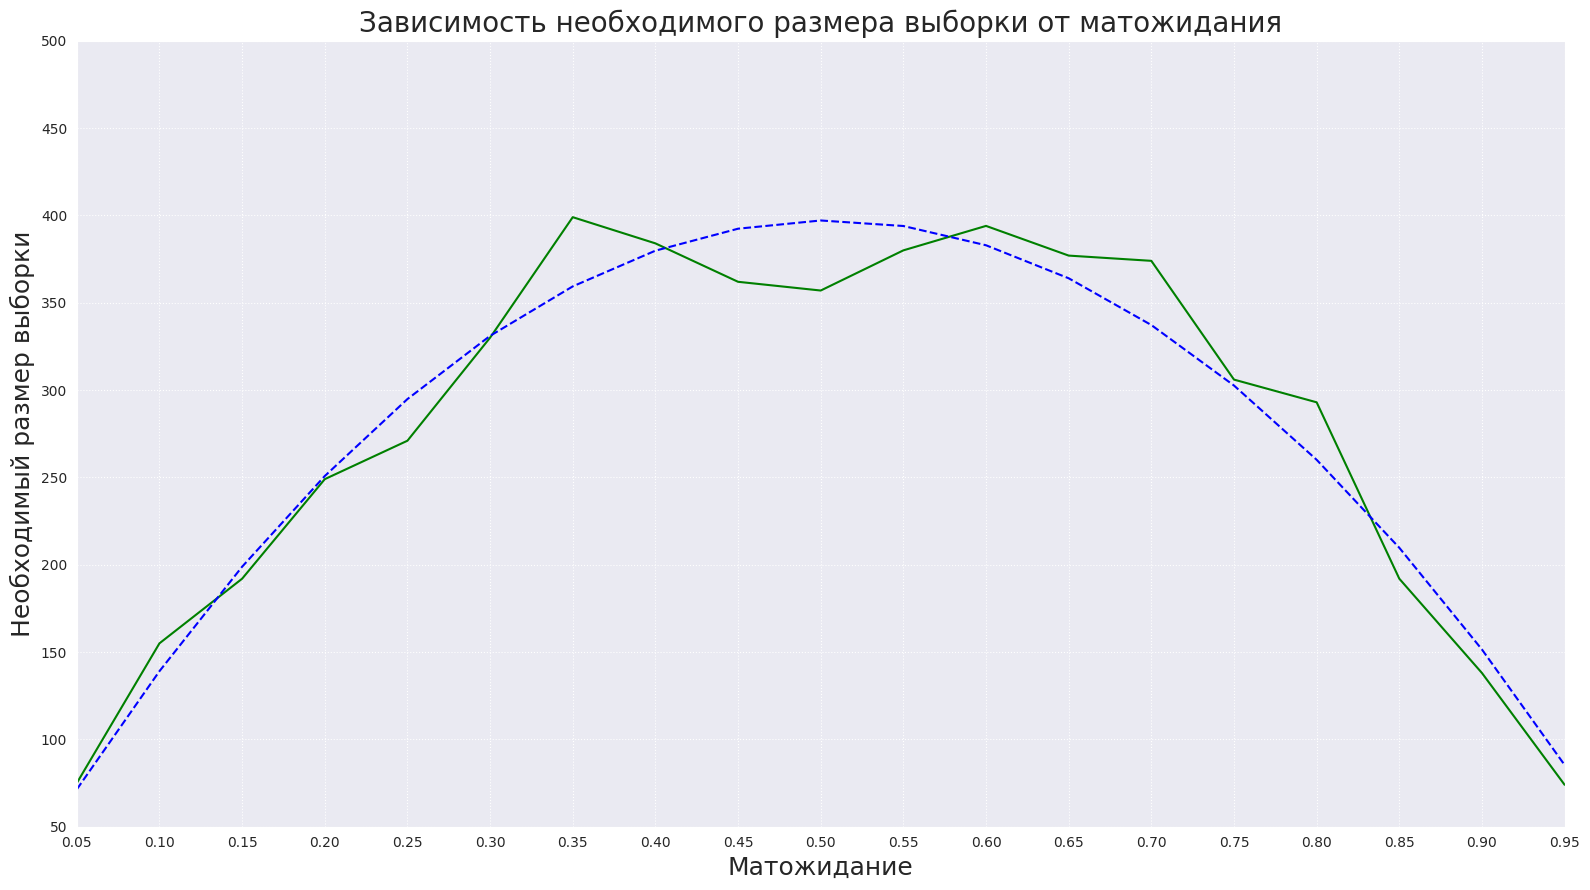

In [47]:
expect = numpy.arange(0.05, 1, 0.05)
n_opt = [count_measure(var_cnt=1000, samples_cnt=500, expectation=a)[2] for a in expect]
show_opt(expect, n_opt)

- Зависимость напоминает параболу ветвями вниз, но она нестабильна в силу малого количества рассматриваемых выборок для каждого значения `n`. Увеличим ее и посмотрим на результат

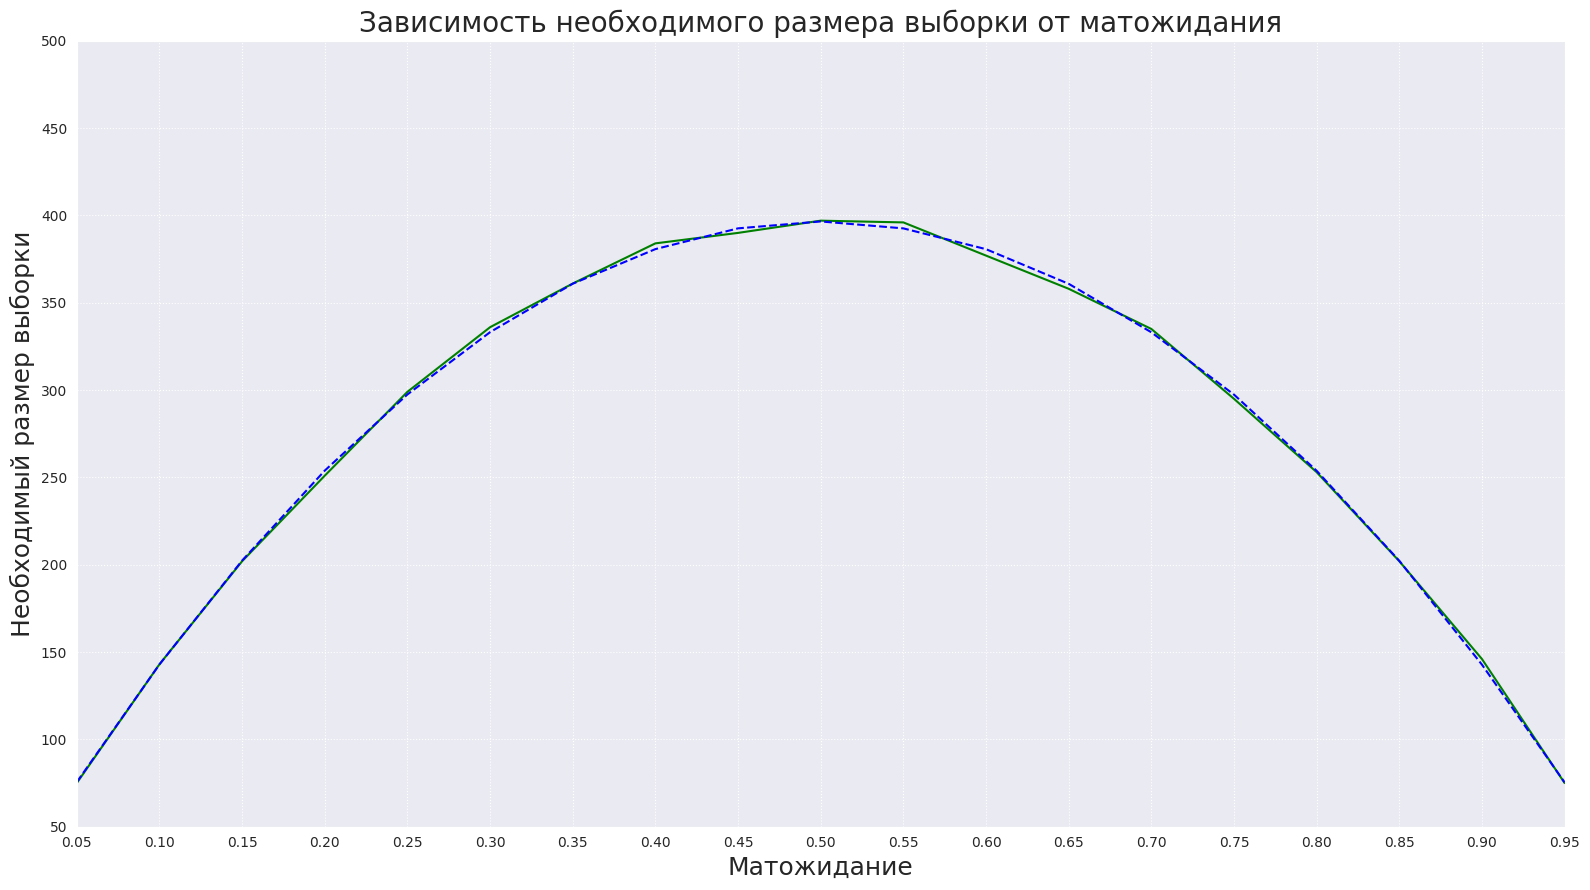

In [48]:
n_opt = [count_measure(var_cnt=1000, samples_cnt=50000, expectation=a)[2] for a in expect]
show_opt(expect, n_opt)

**Выводы:**
- В логарифмических осях зависимость меры отклонения от среднего от количества случайных величин получается линейной убывающей.
- Зависимость необходимого размера выборки от матожидания имеет вид параболы ветвями вниз с осью симметрии при $x=0.5$. Максимальное значение в вершине $\in[395, 400]$
- Результаты эксперимента согласуются с теорией